In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from keras import utils
from keras.datasets import mnist 
import seaborn as sns
from keras.models import Sequential 
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras.initializers import he_normal

Using TensorFlow backend.


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [5]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [6]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = utils.to_categorical(y_train, 10) 
Y_test = utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

# # MLP with 2 hidden Layers+ Batch-Norm on hidden Layers+Dropout + AdamOptimizer

In [8]:
model = Sequential()

model.add(Dense(256,activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(64, activation='relu', kernel_initializer=he_normal()) )
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(output_dim, activation='softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total para

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.5645 - acc: 0.8278 - val_loss: 0.1814 - val_acc: 0.9447
Epoch 2/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.2773 - acc: 0.9195 - val_loss: 0.1297 - val_acc: 0.9601
Epoch 3/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.2147 - acc: 0.9382 - val_loss: 0.1123 - val_acc: 0.9656
Epoch 4/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.1862 - acc: 0.9456 - val_loss: 0.1029 - val_acc: 0.9686
Epoch 5/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.1657 - acc: 0.9514 - val_loss: 0.0889 - val_acc: 0.9720
Epoch 6/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.1505 - acc: 0.9558 - val_loss: 0.0855 - val_acc: 0.9726
Epoch 7/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.1395 - acc: 0.9587 - val_loss: 0.0839 - val_a

Test score: 0.06426155278969091
Test accuracy: 0.9812


<IPython.core.display.Javascript object>


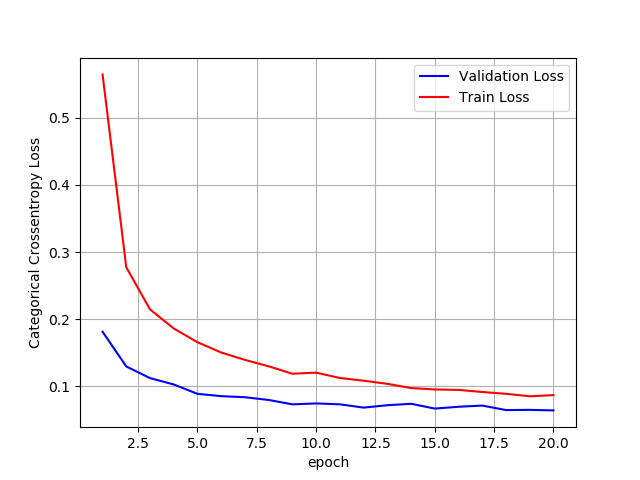

In [11]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# MLP with 3 hidden Layers+ Batch-Norm on hidden Layers+Dropout + AdamOptimizer

In [12]:
model = Sequential()

model.add(Dense(512,activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(128, activation='relu', kernel_initializer=he_normal()) )
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu', kernel_initializer=he_normal()) )
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(output_dim, activation='softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                4128      
__________

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 252us/step - loss: 0.7762 - acc: 0.7667 - val_loss: 0.1904 - val_acc: 0.9416
Epoch 2/20
60000/60000 [==============================] - 14s 230us/step - loss: 0.3374 - acc: 0.9097 - val_loss: 0.1325 - val_acc: 0.9602
Epoch 3/20
60000/60000 [==============================] - 14s 236us/step - loss: 0.2534 - acc: 0.9331 - val_loss: 0.1150 - val_acc: 0.9661
Epoch 4/20
60000/60000 [==============================] - 14s 239us/step - loss: 0.2117 - acc: 0.9448 - val_loss: 0.0982 - val_acc: 0.9717
Epoch 5/20
60000/60000 [==============================] - 14s 231us/step - loss: 0.1910 - acc: 0.9505 - val_loss: 0.0944 - val_acc: 0.9737
Epoch 6/20
60000/60000 [==============================] - 13s 219us/step - loss: 0.1716 - acc: 0.9545 - val_loss: 0.0921 - val_acc: 0.9734
Epoch 7/20
60000/60000 [==============================] - 14s 236us/step - loss: 0.1572 - acc: 0.9590 - val_loss: 0.

Test score: 0.07063923436303157
Test accuracy: 0.9812


<IPython.core.display.Javascript object>


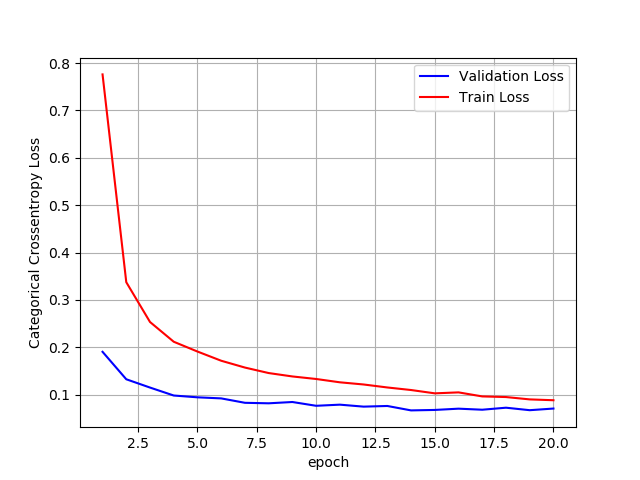

In [14]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# # MLP with 5 hidden Layers+ Batch-Norm on hidden Layers+Dropout + AdamOptimizer


In [15]:
model = Sequential()

model.add(Dense(512,activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256,activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal()))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(128, activation='relu', kernel_initializer=he_normal()) )
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu', kernel_initializer=he_normal()) )
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu', kernel_initializer=he_normal()) )
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(output_dim, activation='softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
__________

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 21s 347us/step - loss: 1.4609 - acc: 0.5132 - val_loss: 0.4259 - val_acc: 0.8846
Epoch 2/20
60000/60000 [==============================] - 16s 275us/step - loss: 0.6273 - acc: 0.8131 - val_loss: 0.2176 - val_acc: 0.9430
Epoch 3/20
60000/60000 [==============================] - 17s 276us/step - loss: 0.4239 - acc: 0.8883 - val_loss: 0.1631 - val_acc: 0.9581
Epoch 4/20
60000/60000 [==============================] - 17s 289us/step - loss: 0.3309 - acc: 0.9180 - val_loss: 0.1439 - val_acc: 0.9635
Epoch 5/20
60000/60000 [==============================] - 18s 293us/step - loss: 0.2837 - acc: 0.9315 - val_loss: 0.1363 - val_acc: 0.9672
Epoch 6/20
60000/60000 [==============================] - 17s 284us/step - loss: 0.2506 - acc: 0.9397 - val_loss: 0.1266 - val_acc: 0.9690
Epoch 7/20
60000/60000 [==============================] - 16s 272us/step - loss: 0.2284 - acc: 0.9467 - val_loss: 0.

Test score: 0.075445240503666
Test accuracy: 0.9826


<IPython.core.display.Javascript object>


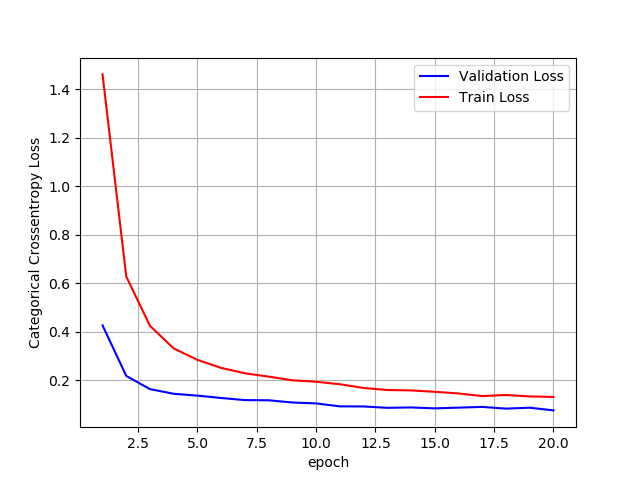

In [17]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)